In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_context('poster')

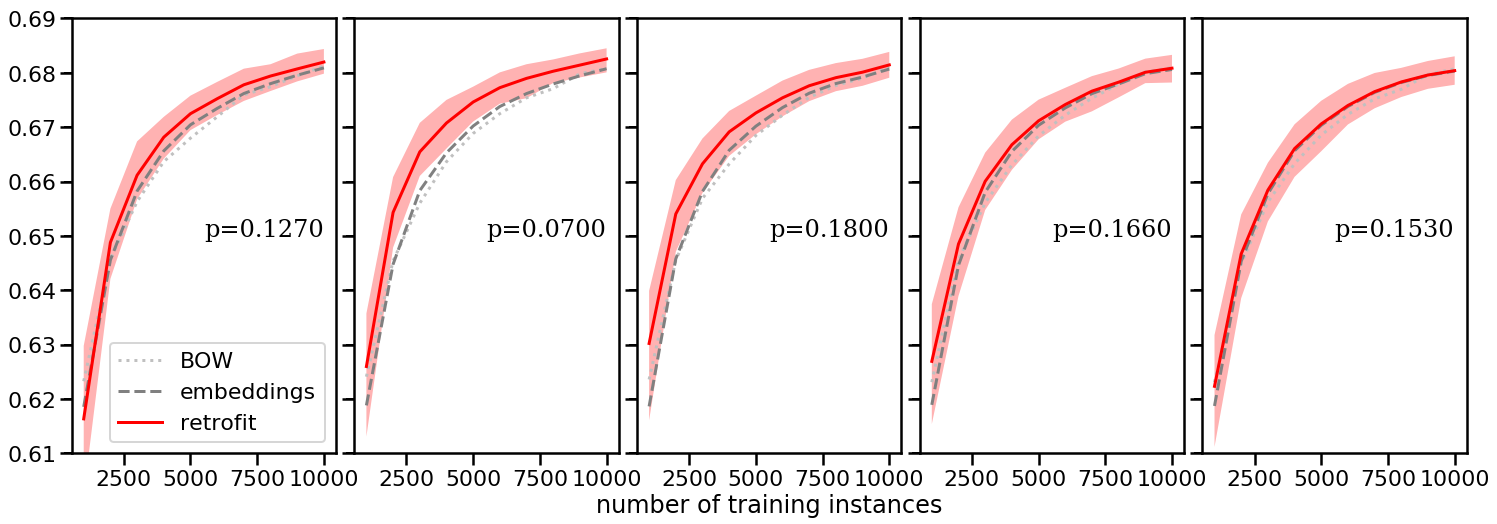

In [56]:
model = 1000

alphas = ['alpha0.01-ALLgender', 'alpha0.1-ALLgender', 'alpha0.25-ALLgender', 'alpha0.5-ALLgender', 'alpha0.75-ALLgender']

fig, axs = plt.subplots(nrows=1, ncols=len(alphas), sharey=True, sharex=True, figsize=(25,8))
plt.subplots_adjust(wspace=0.07)

for t, target in enumerate(alphas):
    ax = axs[t]
    df = pd.DataFrame()
    for i in range(1000, 11000, 1000):
        try:
            x = pd.read_csv('../results/i{}/100runs/{}_{}.csv'.format(model, target, i), index_col=0)
            df = df.append(x)
        except FileNotFoundError:
            pass

    df['number of training instances'] = df.known.copy()
    df['embeddings'] = df.profiles.copy()


    ylim_target = (0.61, 0.69) if 'gender' in target else (0.25, 0.33)
    
    means = df.groupby('known').mean()
    for (y_, color, style) in zip(['BOW', 'embeddings', 'retrofit'], ['silver', 'grey', 'red'], [':', '--', '-']):
        means.plot.line(x='number of training instances', y=y_, ylim=ylim_target, color=color, linestyle=style, ax=ax);
    lower = df.groupby('known').quantile(0.025)
    upper = df.groupby('known').quantile(0.975)
    ax.fill_between(means.index.tolist(), lower.retrofit, upper.retrofit, alpha=0.3, facecolor='red')

    if t > 0:
        ax.legend_.remove()
    if t != 2:
        ax.set_xlabel('')
    
    diff = df.retrofit.mean() - df.profiles.mean()
    anti = df[(df.retrofit - df.profiles) > diff*2]
    ax.text(5500, 0.65, "p=%.4f" % (len(anti)/len(df)), family='serif')

fig.savefig('../results/i1000.gender_ALL.png'.format(target), dpi=200, bbox_inches='tight', pad_inches=0.0)


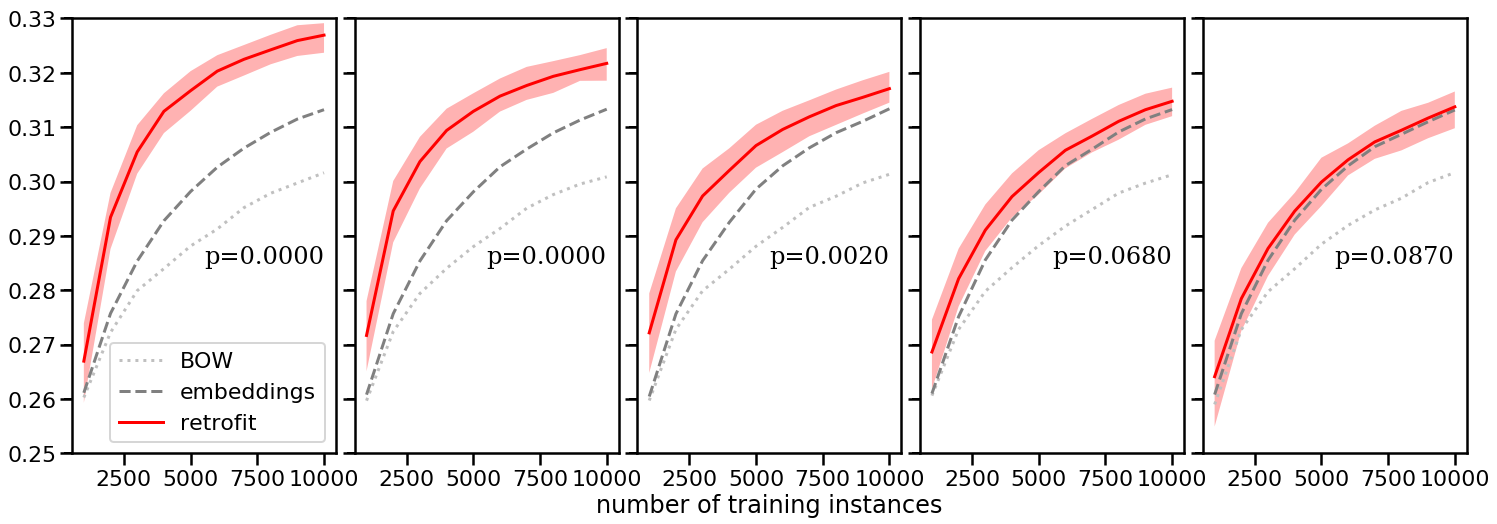

In [55]:
model = 1000

alphas = ['alpha0.01-ALLage', 'alpha0.1-ALLage', 'alpha0.25-ALLage', 'alpha0.5-ALLage', 'alpha0.75-ALLage']

fig, axs = plt.subplots(nrows=1, ncols=len(alphas), sharey=True, sharex=True, figsize=(25,8))
plt.subplots_adjust(wspace=0.07)

for t, target in enumerate(alphas):
    ax = axs[t]
    df = pd.DataFrame()
    for i in range(1000, 11000, 1000):
        try:
            x = pd.read_csv('../results/i{}/100runs/{}_{}.csv'.format(model, target, i), index_col=0)
            df = df.append(x)
        except FileNotFoundError:
            pass

    df['number of training instances'] = df.known.copy()
    df['embeddings'] = df.profiles.copy()


    ylim_target = (0.61, 0.69) if 'gender' in target else (0.25, 0.33)
    
    means = df.groupby('known').mean()
    for (y_, color, style) in zip(['BOW', 'embeddings', 'retrofit'], ['silver', 'grey', 'red'], [':', '--', '-']):
        means.plot.line(x='number of training instances', y=y_, ylim=ylim_target, color=color, linestyle=style, ax=ax);
    lower = df.groupby('known').quantile(0.025)
    upper = df.groupby('known').quantile(0.975)
    ax.fill_between(means.index.tolist(), lower.retrofit, upper.retrofit, alpha=0.3, facecolor='red')

    if t > 0:
        ax.legend_.remove()
    if t != 2:
        ax.set_xlabel('')

    
    diff = df.retrofit.mean() - df.profiles.mean()
    anti = df[(df.retrofit - df.profiles) > diff*2]
    ax.text(5500, 0.285, "p=%.4f" % (len(anti)/len(df)), family='serif')

fig.savefig('../results/i1000.age_ALL.png'.format(target), dpi=200, bbox_inches='tight', pad_inches=0.0)
    

/Users/dirkhovy/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  _common_kinds = ['line', 'bar', 'barh',


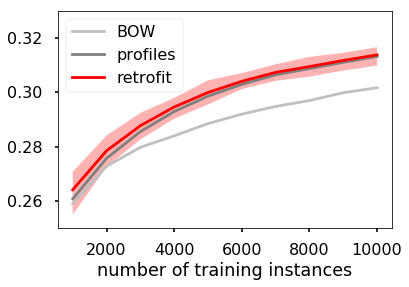

In [98]:
fig, ax = plt.subplots()
means = df.groupby('known').mean()
means.plot.line(x='number of training instances', y=['BOW', 'profiles', 'retrofit'], ylim=ylim_target, color=['silver', 'grey', 'red'], ax=ax);
lower = df.groupby('known').quantile(0.025)
upper = df.groupby('known').quantile(0.975)
ax.fill_between(means.index.tolist(), lower.retrofit, upper.retrofit, alpha=0.3, facecolor='red')



In [82]:
df

,known,profiles,retrofit,BOW,number of training instances,embeddings
0,1000,0.622685,0.626325,0.624413,1000,0.622685
1,1000,0.616311,0.620752,0.620639,1000,0.616311
2,1000,0.614655,0.618244,0.611807,1000,0.614655
3,1000,0.611900,0.616887,0.617760,1000,0.611900
4,1000,0.615169,0.618974,0.630253,1000,0.615169
5,1000,0.619251,0.623528,0.629718,1000,0.619251
6,1000,0.619549,0.623847,0.623127,1000,0.619549
7,1000,0.615663,0.619344,0.621246,1000,0.615663
8,1000,0.622829,0.626952,0.628176,1000,0.622829
9,1000,0.620979,0.624228,0.621215,1000,0.620979


In [86]:
diff = df.retrofit.mean() - df.profiles.mean()
anti = df[(df.retrofit - df.profiles) >= diff*2]
print("p=%.4f" % (len(anti)/len(df)))

p=0.1530
